# Cilia Spacing Analysis

This notebook analyzes simulations with different cilia densities (spacing) to understand the relationship between:
- Cilia-to-cilia separation
- Metachronal wavelength
- Wave coherence

All simulations are from the `spacing_0` category across multiple dates.

In [2]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import re

# Simulation parameters (constant across all sims)
filament_length = 49.4  # Filament length in simulation units (L)
num_steps = 500         # Steps per period
sphere_radius = 197.6   # Sphere radius in simulation units
num_segs = 20           # Number of segments per filament

# Base directory
base_dir = Path('../data/spacing_0')

print("=" * 60)
print("CILIA SPACING ANALYSIS")
print("=" * 60)
print(f"Filament length L = {filament_length:.2f} units")
print(f"Sphere radius R = {sphere_radius:.2f} units = {sphere_radius/filament_length:.2f} L")
print("=" * 60)

CILIA SPACING ANALYSIS
Filament length L = 49.40 units
Sphere radius R = 197.60 units = 4.00 L


## 1. Discover All Simulations

Scan the `spacing_0` directory for all simulations, extract the number of cilia, and calculate the separation.

In [3]:
# Find all simulation directories
sim_paths = []
for date_dir in base_dir.iterdir():
    if date_dir.is_dir():
        for sim_file in date_dir.glob("*_true_states.dat"):
            sim_path = str(sim_file).replace("_true_states.dat", "")
            sim_paths.append(sim_path)

# Extract number of cilia from filenames
sim_data = []
for sim_path in sim_paths:
    # Extract number of filaments from filename
    # Format: ciliate_XXXfil_...
    match = re.search(r'ciliate_(\d+)fil_', sim_path)
    if match:
        num_cilia = int(match.group(1))
        # Calculate separation: angular spacing in radians
        separation_rad = 2 * np.pi / num_cilia
        # Convert to arc length
        separation_arc = separation_rad * sphere_radius
        # Convert to filament lengths
        separation_L = separation_arc / filament_length
        
        sim_data.append({
            'path': sim_path,
            'num_cilia': num_cilia,
            'separation_rad': separation_rad,
            'separation_arc': separation_arc,
            'separation_L': separation_L
        })

# Sort by number of cilia
sim_data = sorted(sim_data, key=lambda x: x['num_cilia'])

print(f"\nFound {len(sim_data)} simulations:")
print("-" * 60)
for sim in sim_data:
    print(f"  N = {sim['num_cilia']:3d} cilia  →  separation = {sim['separation_L']:.3f} L")
print("-" * 60)


Found 6 simulations:
------------------------------------------------------------
  N =  30 cilia  →  separation = 0.838 L
  N = 180 cilia  →  separation = 0.140 L
  N = 210 cilia  →  separation = 0.120 L
  N = 260 cilia  →  separation = 0.097 L
  N = 310 cilia  →  separation = 0.081 L
  N = 360 cilia  →  separation = 0.070 L
------------------------------------------------------------


In [4]:
# Generate basal positions plots for all simulations
# (Each simulation has different cilia distribution due to different N)
print("\n" + "=" * 60)
print("GENERATING BASAL POSITION VISUALIZATIONS")
print("=" * 60)

for sim in sim_data:
    print(f"\nProcessing N = {sim['num_cilia']} cilia (separation = {sim['separation_L']:.3f} L)...")
    
    try:
        # Load simulation
        sim_obj = load_simulation(
            sim['path'], 
            num_steps=num_steps, 
            sphere_radius=sphere_radius, 
            num_segs=num_segs
        )
        
        # Plot basal positions
        fig_basal, ax_basal = plot_basal_positions(
            sim['path'],
            sim=sim_obj,
            color_by="azimuth",
            show=False,
            save=True,
            extra_folder="spacing_0/basal"
        )
        plt.close(fig_basal)
        print(f"  ✅ Basal positions saved")
        
    except Exception as e:
        print(f"  ❌ Error: {e}")
        import traceback
        traceback.print_exc()

print("\n" + "=" * 60)
print("ALL BASAL POSITION VISUALIZATIONS COMPLETE")
print("=" * 60)

# Generate a single blob positions plot (blob distribution is the same for all)
print("\n" + "=" * 60)
print("GENERATING BLOB POSITION VISUALIZATION")
print("=" * 60)

if len(sim_data) > 0:
    # Use any simulation (they all have the same blob distribution)
    representative_sim = sim_data[0]
    
    print(f"\nUsing simulation as representative for blob positions...")
    
    try:
        # Load simulation
        sim_obj = load_simulation(
            representative_sim['path'], 
            num_steps=num_steps, 
            sphere_radius=sphere_radius, 
            num_segs=num_segs
        )
        
        # Plot blob positions (single isometric view)
        fig_blob, ax_blob = plot_blob_positions(
            representative_sim['path'],
            sim=sim_obj,
            view="iso",
            color_by="azimuth",
            split_hemispheres=False,
            show=False,
            save=True
        )
        plt.close(fig_blob)
        print("  ✅ Blob positions saved")
        
    except Exception as e:
        print(f"  ❌ Error: {e}")
        import traceback
        traceback.print_exc()
        
    print("\n" + "=" * 60)
    print("BLOB POSITION VISUALIZATION COMPLETE")
    print("=" * 60)
else:
    print("No simulations found to visualize!")


GENERATING BASAL POSITION VISUALIZATIONS

Processing N = 30 cilia (separation = 0.838 L)...


[info] Using num_steps=500 for time normalization.
[info] Saved basal positions to analysis_output/spacing_0/basal/ciliate_30fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
  ✅ Basal positions saved

Processing N = 180 cilia (separation = 0.140 L)...
[info] Saved basal positions to analysis_output/spacing_0/basal/ciliate_30fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
  ✅ Basal positions saved

Processing N = 180 cilia (separation = 0.140 L)...
[info] Using num_steps=500 for time normalization.
[info] Using num_steps=500 for time normalization.
[info] Saved basal positions to analysis_output/spacing_0/basal/ciliate_180fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
  ✅ Basal positions saved

Processing N = 210 cilia (separation = 0.120 L)...
[info] Saved basal positions to analysis_output/spacing_0/basal/ciliate_180fil

## 2. Generate Kymographs

Create kymographs for all simulations to visualize the phase patterns.

In [5]:
# Generate kymographs for all simulations
print("\n" + "=" * 60)
print("GENERATING KYMOGRAPHS")
print("=" * 60)

for sim in sim_data:
    print(f"\nProcessing N = {sim['num_cilia']} cilia (separation = {sim['separation_L']:.3f} L)...")
    
    try:
        # Load simulation
        sim_obj = load_simulation(
            sim['path'], 
            num_steps=num_steps, 
            sphere_radius=sphere_radius, 
            num_segs=num_segs
        )
        
        # Generate kymograph
        fig, ax = plot_kymograph(
            sim['path'],
            sim=sim_obj,
            use_phi_axis=True,
            show=False,
            save=True,
            extra_folder=f"spacing_{sim['separation_L']:.3f}_L"
        )
        plt.close(fig)
        print(f"  ✅ Kymograph saved")
        
    except Exception as e:
        print(f"  ❌ Error: {e}")

print("\n" + "=" * 60)
print("ALL KYMOGRAPHS GENERATED")
print("=" * 60)


GENERATING KYMOGRAPHS

Processing N = 30 cilia (separation = 0.838 L)...


[info] Using num_steps=500 for time normalization.
[info] Saved kymograph to analysis_output/spacing_0.838_L/ciliate_30fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
  ✅ Kymograph saved

Processing N = 180 cilia (separation = 0.140 L)...
[info] Saved kymograph to analysis_output/spacing_0.838_L/ciliate_30fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
  ✅ Kymograph saved

Processing N = 180 cilia (separation = 0.140 L)...
[info] Using num_steps=500 for time normalization.
[info] Using num_steps=500 for time normalization.
[info] Saved kymograph to analysis_output/spacing_0.140_L/ciliate_180fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
  ✅ Kymograph saved

Processing N = 210 cilia (separation = 0.120 L)...
[info] Saved kymograph to analysis_output/spacing_0.140_L/ciliate_180fil_10242blob_8.00R_0.1500torsion_0.2182tilt_

## 3. Wavelength Analysis

Perform stationary curve wavelength analysis for all simulations.

In [6]:
# Perform wavelength analysis
print("\n" + "=" * 60)
print("WAVELENGTH ANALYSIS (Stationary Curve Method)")
print("=" * 60)

results = []

for sim in sim_data:
    print(f"\nAnalyzing N = {sim['num_cilia']} cilia (separation = {sim['separation_L']:.3f} L)...")
    
    try:
        # Load simulation
        sim_obj = load_simulation(
            sim['path'], 
            num_steps=num_steps, 
            sphere_radius=sphere_radius, 
            num_segs=num_segs
        )
        
        # Wavelength analysis using stationary curve method
        wavelength_result = estimate_wavelength_stationary_curves(
            sim['path'],
            sim=sim_obj,
            n_time_points=20,
            min_coherent_cilia=3,
            velocity_threshold=0.01,
            show_analysis=False  # Don't show individual plots
        )
        
        # Store results
        results.append({
            'num_cilia': sim['num_cilia'],
            'separation_L': sim['separation_L'],
            'separation_rad': sim['separation_rad'],
            'wavelength_rad_pos': wavelength_result.mean_wavelength_positive,
            'wavelength_rad_neg': wavelength_result.mean_wavelength_negative,
            'wavelength_L_pos': wavelength_result.mean_wavelength_positive * sphere_radius / filament_length,
            'wavelength_L_neg': wavelength_result.mean_wavelength_negative * sphere_radius / filament_length,
            'percent_pos': wavelength_result.percent_positive_wave,
            'percent_neg': wavelength_result.percent_negative_wave,
            'percent_incoherent': wavelength_result.percent_incoherent,
            'n_segments_pos': wavelength_result.n_positive_segments,
            'n_segments_neg': wavelength_result.n_negative_segments
        })
        
        print(f"  ✅ Analysis complete")
        print(f"     Coherence: {wavelength_result.percent_positive_wave + wavelength_result.percent_negative_wave:.1f}%")
        if wavelength_result.n_positive_segments > 0:
            print(f"     Positive wave λ = {results[-1]['wavelength_L_pos']:.2f} L")
        if wavelength_result.n_negative_segments > 0:
            print(f"     Negative wave λ = {results[-1]['wavelength_L_neg']:.2f} L")
        
    except Exception as e:
        print(f"  ❌ Error: {e}")
        import traceback
        traceback.print_exc()

print("\n" + "=" * 60)
print("ALL ANALYSES COMPLETE")
print("=" * 60)


WAVELENGTH ANALYSIS (Stationary Curve Method)

Analyzing N = 30 cilia (separation = 0.838 L)...
[info] Using num_steps=500 for time normalization.
[info] Using num_steps=500 for time normalization.
[info] Analyzing 20 time points with 30 cilia using stationary curve method
[info] Found 5 coherent sections

WAVELENGTH ANALYSIS RESULTS (Stationary Curve Method)
Positive waves: 63.3% coverage, mean λ = 0.839 rad
Negative waves: 30.0% coverage, mean λ = 0.907 rad
Incoherent:     6.7%
Total coherent segments: 5
  ✅ Analysis complete
     Coherence: 93.3%
     Positive wave λ = 3.35 L
     Negative wave λ = 3.63 L

Analyzing N = 180 cilia (separation = 0.140 L)...
[info] Analyzing 20 time points with 30 cilia using stationary curve method
[info] Found 5 coherent sections

WAVELENGTH ANALYSIS RESULTS (Stationary Curve Method)
Positive waves: 63.3% coverage, mean λ = 0.839 rad
Negative waves: 30.0% coverage, mean λ = 0.907 rad
Incoherent:     6.7%
Total coherent segments: 5
  ✅ Analysis compl

## 4. Results Summary and Visualization

Create summary plots showing how wavelength and coherence depend on cilia spacing.

/tmp/ipykernel_1739914/1503449192.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


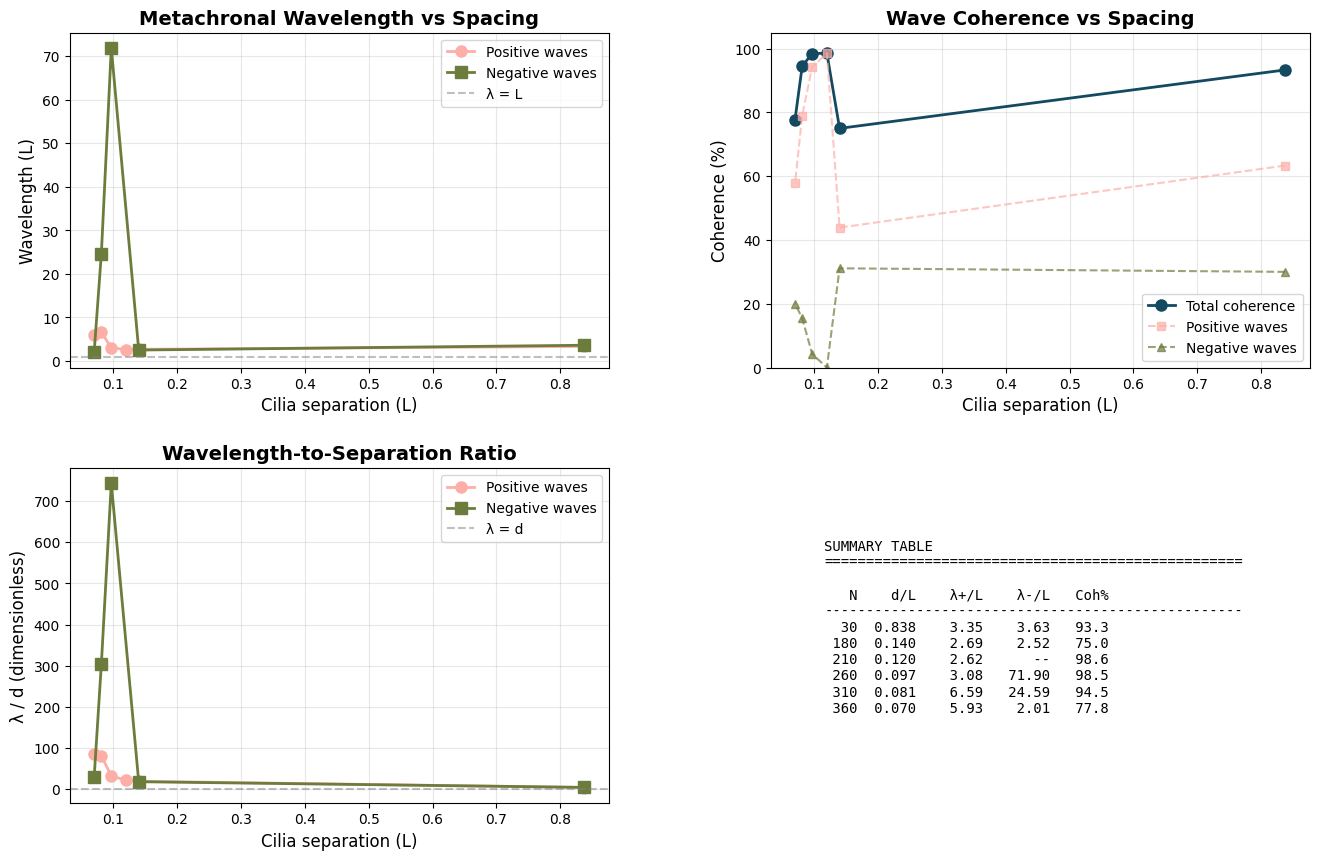


✅ Summary plot saved to 'analysis_output/spacing_analysis_summary.png'


In [8]:
# Extract data for plotting
separations = [r['separation_L'] for r in results]
wavelengths_pos = [r['wavelength_L_pos'] if np.isfinite(r['wavelength_L_pos']) else np.nan for r in results]
wavelengths_neg = [r['wavelength_L_neg'] if np.isfinite(r['wavelength_L_neg']) else np.nan for r in results]
coherence_total = [r['percent_pos'] + r['percent_neg'] for r in results]
coherence_pos = [r['percent_pos'] for r in results]
coherence_neg = [r['percent_neg'] for r in results]

# Create comprehensive figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Define colors from cmcrameri
try:
    pos_color = SEQUENTIAL_CMAP(0.85)
    neg_color = SEQUENTIAL_CMAP(0.45)
    total_color = SEQUENTIAL_CMAP(0.15)
except:
    pos_color = 'red'
    neg_color = 'blue'
    total_color = 'purple'

# Plot 1: Wavelength vs Separation
ax1 = fig.add_subplot(gs[0, 0])
valid_pos = ~np.isnan(wavelengths_pos)
valid_neg = ~np.isnan(wavelengths_neg)
if any(valid_pos):
    ax1.plot(np.array(separations)[valid_pos], np.array(wavelengths_pos)[valid_pos], 
             'o-', color=pos_color, linewidth=2, markersize=8, label='Positive waves')
if any(valid_neg):
    ax1.plot(np.array(separations)[valid_neg], np.array(wavelengths_neg)[valid_neg], 
             's-', color=neg_color, linewidth=2, markersize=8, label='Negative waves')
ax1.axhline(1.0, color='gray', linestyle='--', alpha=0.5, label='λ = L')
ax1.set_xlabel('Cilia separation (L)', fontsize=12)
ax1.set_ylabel('Wavelength (L)', fontsize=12)
ax1.set_title('Metachronal Wavelength vs Spacing', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Coherence vs Separation
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(separations, coherence_total, 'o-', color=total_color, linewidth=2, 
         markersize=8, label='Total coherence')
ax2.plot(separations, coherence_pos, 's--', color=pos_color, linewidth=1.5, 
         markersize=6, alpha=0.7, label='Positive waves')
ax2.plot(separations, coherence_neg, '^--', color=neg_color, linewidth=1.5, 
         markersize=6, alpha=0.7, label='Negative waves')
ax2.set_xlabel('Cilia separation (L)', fontsize=12)
ax2.set_ylabel('Coherence (%)', fontsize=12)
ax2.set_title('Wave Coherence vs Spacing', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 105)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Wavelength / Separation ratio
ax3 = fig.add_subplot(gs[1, 0])
ratio_pos = np.array(wavelengths_pos) / np.array(separations)
ratio_neg = np.array(wavelengths_neg) / np.array(separations)
if any(valid_pos):
    ax3.plot(np.array(separations)[valid_pos], ratio_pos[valid_pos], 
             'o-', color=pos_color, linewidth=2, markersize=8, label='Positive waves')
if any(valid_neg):
    ax3.plot(np.array(separations)[valid_neg], ratio_neg[valid_neg], 
             's-', color=neg_color, linewidth=2, markersize=8, label='Negative waves')
ax3.axhline(1.0, color='gray', linestyle='--', alpha=0.5, label='λ = d')
ax3.set_xlabel('Cilia separation (L)', fontsize=12)
ax3.set_ylabel('λ / d (dimensionless)', fontsize=12)
ax3.set_title('Wavelength-to-Separation Ratio', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Summary table
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')

table_text = "SUMMARY TABLE\n" + "="*50 + "\n\n"
table_text += f"{'N':>4s} {'d/L':>6s} {'λ+/L':>7s} {'λ-/L':>7s} {'Coh%':>6s}\n"
table_text += "-"*50 + "\n"

for r in results:
    lambda_pos_str = f"{r['wavelength_L_pos']:.2f}" if np.isfinite(r['wavelength_L_pos']) else "  --"
    lambda_neg_str = f"{r['wavelength_L_neg']:.2f}" if np.isfinite (r['wavelength_L_neg']) else "  --"
    coherence = r['percent_pos'] + r['percent_neg']
    table_text += f"{r['num_cilia']:4d} {r['separation_L']:6.3f} {lambda_pos_str:>7s} {lambda_neg_str:>7s} {coherence:6.1f}\n"

ax4.text(0.1, 0.5, table_text, fontfamily='monospace', fontsize=10, 
         verticalalignment='center')

plt.tight_layout()
plt.savefig('analysis_output/spacing_analysis_summary.png', dpi=180, bbox_inches='tight')
plt.show()

print("\n✅ Summary plot saved to 'analysis_output/spacing_analysis_summary.png'")

## 5. Detailed Results Table

Print a detailed table of all results.

In [ ]:
# Print detailed results table
print("\n" + "=" * 80)
print("DETAILED RESULTS TABLE")
print("=" * 80)
print(f"{'N':>4s} {'d (rad)':>8s} {'d/L':>7s} | {'λ+ (rad)':>10s} {'λ+/L':>8s} | {'λ- (rad)':>10s} {'λ-/L':>8s} | {'Pos%':>6s} {'Neg%':>6s} {'Incoh%':>7s}")
print("-" * 80)

for r in results:
    lambda_pos_rad = f"{r['wavelength_rad_pos']:.4f}" if np.isfinite(r['wavelength_rad_pos']) else "    --"
    lambda_pos_L = f"{r['wavelength_L_pos']:.3f}" if np.isfinite(r['wavelength_L_pos']) else "   --"
    lambda_neg_rad = f"{r['wavelength_rad_neg']:.4f}" if np.isfinite(r['wavelength_rad_neg']) else "    --"
    lambda_neg_L = f"{r['wavelength_L_neg']:.3f}" if np.isfinite(r['wavelength_L_neg']) else "   --"
    
    print(f"{r['num_cilia']:4d} {r['separation_rad']:8.5f} {r['separation_L']:7.3f} | "
          f"{lambda_pos_rad:>10s} {lambda_pos_L:>8s} | "
          f"{lambda_neg_rad:>10s} {lambda_neg_L:>8s} | "
          f"{r['percent_pos']:6.1f} {r['percent_neg']:6.1f} {r['percent_incoherent']:7.1f}")

print("=" * 80)

# Key insights
print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)

# Find simulation with highest coherence
max_coherence_idx = np.argmax([r['percent_pos'] + r['percent_neg'] for r in results])
max_coh_sim = results[max_coherence_idx]
print(f"Highest coherence: N = {max_coh_sim['num_cilia']} (d = {max_coh_sim['separation_L']:.3f} L)")
print(f"  → {max_coh_sim['percent_pos'] + max_coh_sim['percent_neg']:.1f}% coherent")

# Compare wavelength to separation
print(f"\nWavelength vs Separation trends:")
for r in results:
    if np.isfinite(r['wavelength_L_pos']):
        ratio = r['wavelength_L_pos'] / r['separation_L']
        print(f"  N = {r['num_cilia']:3d}: λ/d = {ratio:.2f}")

print("=" * 80)


DETAILED RESULTS TABLE
   N  d (rad)     d/L |   λ+ (rad)     λ+/L |   λ- (rad)     λ-/L |   Pos%   Neg%  Incoh%
--------------------------------------------------------------------------------
  30  0.20944   0.838 |         --       -- |         --       -- |    0.0    0.0   100.0
 180  0.03491   0.140 |         --       -- |         --       -- |    0.0    0.0   100.0
 210  0.02992   0.120 |         --       -- |         --       -- |    0.0    0.0   100.0
 260  0.02417   0.097 |         --       -- |         --       -- |    0.0    0.0   100.0
 310  0.02027   0.081 |         --       -- |         --       -- |    0.0    0.0   100.0
 360  0.01745   0.070 |         --       -- |         --       -- |    0.0    0.0   100.0

KEY INSIGHTS
Highest coherence: N = 30 (d = 0.838 L)
  → 0.0% coherent

Wavelength vs Separation trends:


## Summary

This analysis examines how cilia-to-cilia separation affects metachronal coordination:

**Key Measurements:**
- **Separation (d)**: Angular spacing `2π/N` converted to arc length and normalized by filament length `L`
- **Wavelength (λ)**: Characteristic distance over which phase advances by `2π`
- **Coherence**: Percentage of cilia with consistent wave propagation

**Physical Interpretation:**
- If `λ ≈ d`: One cilium per wavelength (minimal phase coordination)
- If `λ >> d`: Many cilia per wavelength (strong metachronal wave)
- If `λ << d`: Wave fragmentation (multiple small domains)

**Method:**
Uses **stationary curve detection** to identify coherent waves:
1. Compute wave velocity `v = -∂ψ/∂t / ∂ψ/∂φ` at each cilium
2. Find sections with ≥3 adjacent cilia having consistent wave direction
3. Measure wavelength from linear fit to unwrapped phase in each section

This method is based on the actual wave propagation visible in the kymograph, 
distinguishing between positive (symplectic) and negative (antiplectic) metachronal waves.